 ## Load the Dataset

In [ ]:
import pandas as pd

# df = pd.read_csv('data/benin-malanville.csv')  # Make sure this 
# file exists
df = pd.read_csv("../data/benin_clean.csv", parse_dates=["Timestamp"])
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


## Summary Stats & Missing Values


In [7]:
df.describe()
df.isna().sum().sort_values(ascending=False)

Comments         525600
GHI                   0
Timestamp             0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

## Outlier Detection with Z-Scores

In [3]:
from scipy.stats import zscore

for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    if col in df.columns:
        df['z_' + col] = zscore(df[col])
        print(f"{col} outliers:", (df['z_' + col].abs() > 3).sum())


GHI outliers: 89
DNI outliers: 0
DHI outliers: 3738
ModA outliers: 27
ModB outliers: 63
WS outliers: 3109
WSgust outliers: 3500


## Clean the Data

In [8]:
# Drop rows where key columns are missing
df = df.dropna(subset=['GHI', 'DNI', 'DHI'])

# Fill missing sensor values with median
for col in ['ModA', 'ModB', 'WS', 'WSgust']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Drop z-score columns (if any)
df.drop(columns=[col for col in df.columns if str(col).startswith('z_')], inplace=True)


## Save the Clean Data

In [ ]:
df.to_csv('../data/benin_clean.csv', index=False)


## Time Series Visualizations

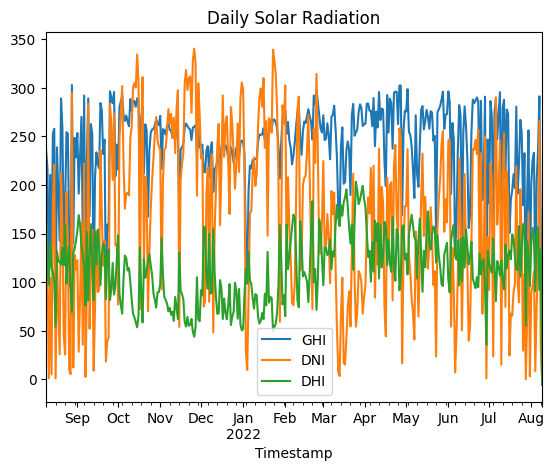

In [10]:
import matplotlib.pyplot as plt

df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Adjust if your time column is named differently
df.set_index('Timestamp').resample('D')[['GHI', 'DNI', 'DHI']].mean().plot()
plt.title('Daily Solar Radiation')
plt.show()


## Correlation Heatmap

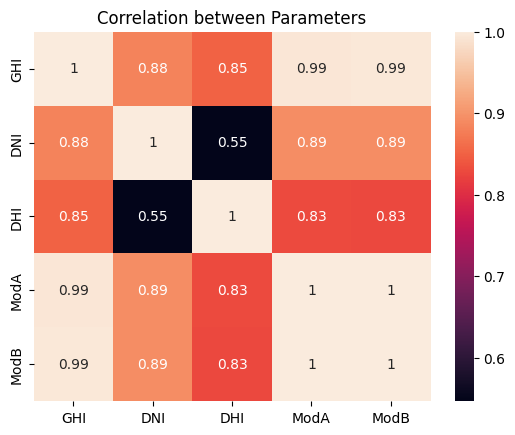

In [11]:
import seaborn as sns

sns.heatmap(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr(), annot=True)
plt.title("Correlation between Parameters")
plt.show()


## Scatter Plots

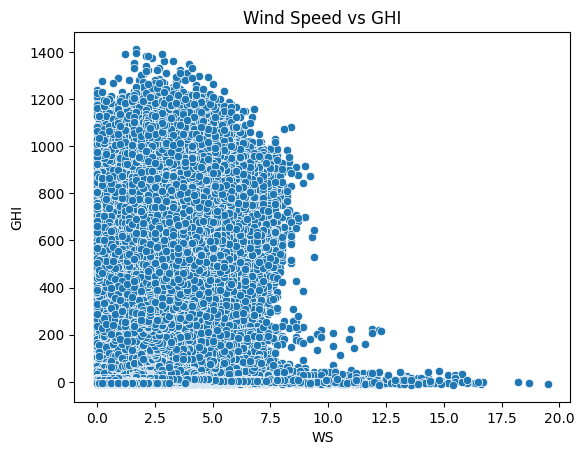

In [12]:
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title("Wind Speed vs GHI")
plt.show()


## Distribution + Wind Rose

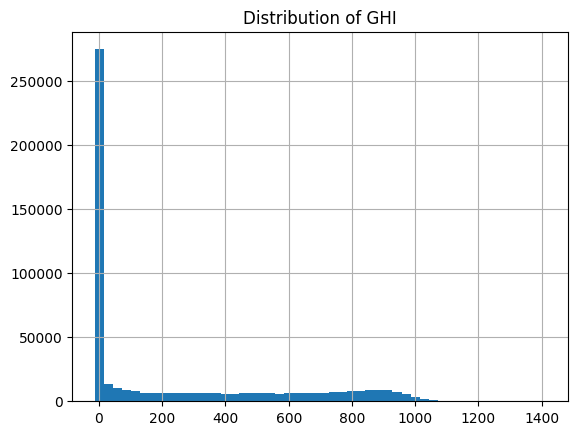

In [13]:
df['GHI'].hist(bins=50)
plt.title("Distribution of GHI")
plt.show()


## Bubble Chart

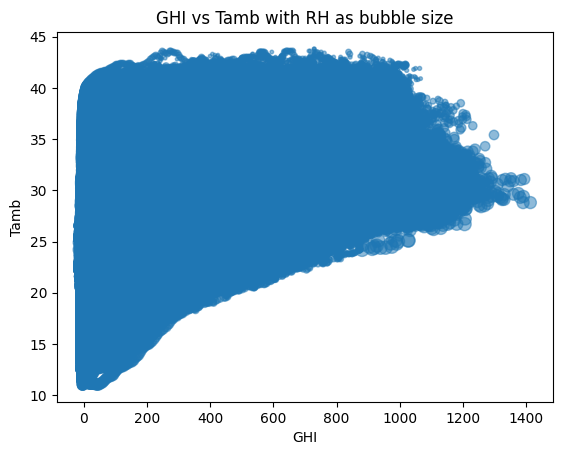

In [14]:
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb with RH as bubble size')
plt.show()
